In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nsei-2018-23/NSEI.csv


In [51]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential



In [52]:
data = pd.read_csv("/kaggle/input/nsei-2018-23/NSEI.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-05-28,10648.349609,10709.799805,10640.549805,10688.650391,10688.650391,232600.0
1,2018-05-29,10689.400391,10717.250000,10616.099609,10633.299805,10633.299805,225800.0
2,2018-05-30,10579.000000,10648.700195,10558.450195,10614.349609,10614.349609,238700.0
3,2018-05-31,10670.099609,10763.799805,10620.400391,10736.150391,10736.150391,610300.0
4,2018-06-01,10738.450195,10764.750000,10681.500000,10696.200195,10696.200195,220600.0
...,...,...,...,...,...,...,...
1230,2023-05-22,18201.099609,18335.250000,18178.849609,18314.400391,18314.400391,262600.0
1231,2023-05-23,18362.900391,18419.750000,18324.199219,18348.000000,18348.000000,270400.0
1232,2023-05-24,18294.800781,18392.599609,18262.949219,18285.400391,18285.400391,232600.0
1233,2023-05-25,18268.900391,18338.099609,18202.400391,18321.150391,18321.150391,235900.0


### Split The data

In [53]:
data_train, data_test = train_test_split(data, test_size=0.3, random_state=42)
print("Train Data Shape:", data_train.shape)
print("Test Data Shape:", data_test.shape)

Train Data Shape: (864, 7)
Test Data Shape: (371, 7)


### Use the Open Stock Price Column to Train Your Model.

In [54]:
train_set = data_train["Open"].values.reshape(-1, 1)
print(train_set.shape)

(864, 1)


### Normalizing the Dataset.

In [55]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_set = scaler.fit_transform(train_set)


### Prepare the data for training

In [56]:
X_train = []
y_train = []

for i in range(60, len(scaled_train_set)):
    X_train.append(scaled_train_set[i-60:i, 0])
    y_train.append(scaled_train_set[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [57]:
print(X_train.shape)
print(y_train.shape)

(804, 60)
(804,)


In [58]:
X_train, y_train = np.array(X_train), np.array(y_train)[:X_train.shape[0]]

### Reshape the data for LSTM

In [59]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### Check Data Preprocessing

In [60]:
print(np.isnan(X_train).any())
print(np.isinf(X_train).any())
print(np.isnan(y_train).any())
print(np.isinf(y_train).any())


True
False
True
False


### Check NaN Values Row-wise:

In [61]:
print(np.isnan(X_train).any(axis=1))


[[False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 

In [62]:
print(np.isnan(y_train).any())


True


In [63]:
# Remove rows with NaN values
condition_X = ~np.isnan(X_train).any(axis=(1, 2))
condition_y = ~np.isnan(y_train)

X_train = X_train[condition_X]
y_train = y_train[condition_y]

In [64]:


# Check again
print(np.isnan(X_train).any())
print(np.isinf(X_train).any())
print(np.isnan(y_train).any())
print(np.isinf(y_train).any())


False
False
False
False


In [65]:
# Print shapes after handling NaN values
print("\nAfter handling NaN values:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


After handling NaN values:
X_train shape: (744, 60, 1)
y_train shape: (803,)


In [66]:
# Check for NaN values in the modified data
print("NaN values in x_train:", np.isnan(X_train).any())
print("NaN values in y_train:", np.isnan(y_train).any())


NaN values in x_train: False
NaN values in y_train: False


In [72]:
X_train, y_train = np.array(X_train), np.array(y_train)[:X_train.shape[0]]

In [73]:
x_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
x_train.shape


(744, 60, 1)

####  Build the LSTM model

In [74]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

In [69]:
# regressor = Sequential()

# regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
# regressor.add(Dropout(0.2))

# regressor.add(LSTM(units=50, return_sequences=True))
# regressor.add(Dropout(0.2))

# regressor.add(LSTM(units=50, return_sequences=True))
# regressor.add(Dropout(0.2))

# regressor.add(LSTM(units=50))
# regressor.add(Dropout(0.2))

# regressor.add(Dense(units=1))

###  Compile the model

In [75]:
model.compile(optimizer='adam', loss='mean_squared_error')

### Train the model

In [76]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
24/24 [==============================] - 9s 95ms/step - loss: 0.1142
Epoch 2/10
24/24 [==============================] - 2s 94ms/step - loss: 0.0798
Epoch 3/10
24/24 [==============================] - 2s 94ms/step - loss: 0.0771
Epoch 4/10
24/24 [==============================] - 2s 94ms/step - loss: 0.0788
Epoch 5/10
24/24 [==============================] - 2s 94ms/step - loss: 0.0776
Epoch 6/10
24/24 [==============================] - 2s 94ms/step - loss: 0.0774
Epoch 7/10
24/24 [==============================] - 2s 92ms/step - loss: 0.0774
Epoch 8/10
24/24 [==============================] - 2s 94ms/step - loss: 0.0768
Epoch 9/10
24/24 [==============================] - 2s 94ms/step - loss: 0.0785
Epoch 10/10
24/24 [==============================] - 3s 105ms/step - loss: 0.0789


###  Preparing the Input for the Model and Plotting the Actual and Predicted Prices for  Stocks

10/10 [==============================] - 2s 32ms/step


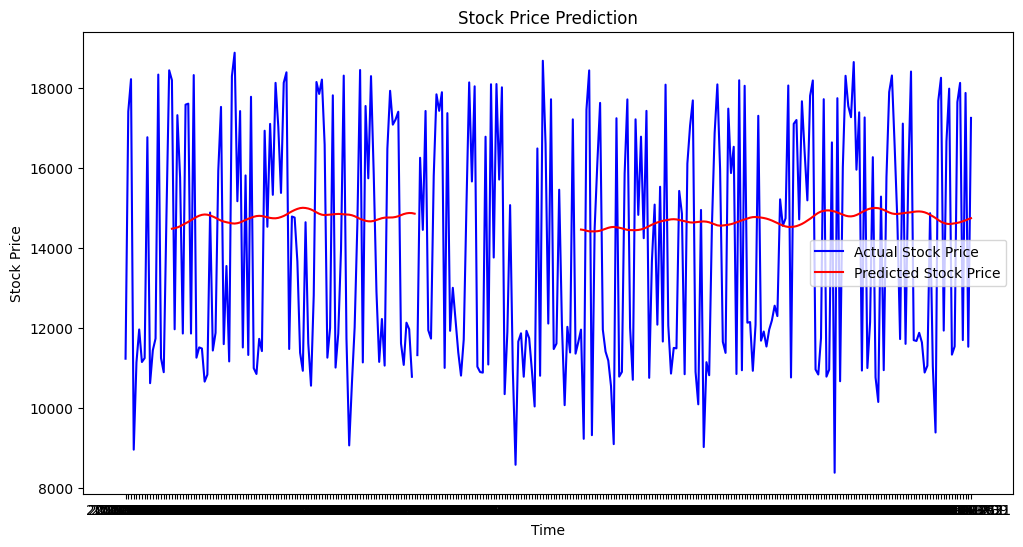

In [77]:
# Assuming you have a test set X_test
if len(data_test) > 0:
    # Normalize the test set
    scaled_X_test = scaler.transform(data_test["Open"].values.reshape(-1, 1))

    # Prepare sequences for LSTM
    X_test_sequences = []
    for i in range(60, len(scaled_X_test)):
        X_test_sequences.append(scaled_X_test[i-60:i, 0])

    X_test_sequences = np.array(X_test_sequences)

    # Reshape the data for LSTM
    X_test_sequences = np.reshape(X_test_sequences, (X_test_sequences.shape[0], X_test_sequences.shape[1], 1))

    # Make predictions using the trained model
    predicted_prices = model.predict(X_test_sequences)

    # Inverse transform to get actual prices
    actual_prices = scaler.inverse_transform(predicted_prices)

    # Assuming data_test is your test dataset
    actual_stock_price = data_test["Open"].values[60:]  # Adjust for the sequence length

    # Extract the corresponding dates for plotting
    dates = data_test["Date"].values[60:]

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(dates, actual_stock_price, label="Actual Stock Price", color="blue")
    plt.plot(dates, actual_prices, label="Predicted Stock Price", color="red")
    plt.title("Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.show()
else:
    print("Test data is empty or not properly initialized.")
